In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer

from keras import backend as K
from keras.initializers import RandomUniform, Initializer, Constant
from keras.models import Sequential 
from keras.layers import Dense, Flatten
from keras.layers import Activation
from keras.optimizer_v2 import rmsprop
from keras.optimizer_v2 import adam

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

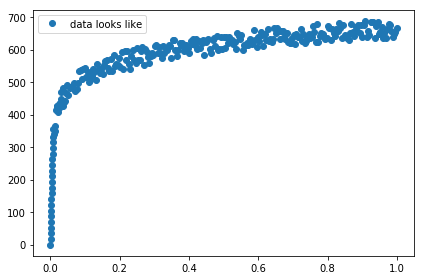

In [29]:
data = np.loadtxt("E:/nmtuan97/1_scripts/ml_learning/data_test.csv", delimiter=',')
X = data[:,:1]
y = data[:,1:2]

X = MinMaxScaler().fit_transform(X)


plt.plot(X, y, 'o', label='data looks like')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
#train model using decision tree
r2_ = 0.99
r2_train_ = 0.0
r2_test_ = 0.0
max_ = 0
while r2_test_ < float(r2_):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
    
    dt_reg = DecisionTreeRegressor(max_depth=5)
    dt_reg.fit(X_train, y_train)
    
    y_train_predicted_svr_ = dt_reg.predict(X_train)
    y_test_predicted_svr_ = dt_reg.predict(X_test)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_svr_))
    r2_train_ = r2_score(y_train, y_train_predicted_svr_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_svr_)
    # Evaluating test dataset
    rmse_test_ = np.sqrt(mean_squared_error(y_test, y_test_predicted_svr_))
    r2_test_ = r2_score(y_test, y_test_predicted_svr_)
    mae_test_ = mean_absolute_error(y_test, y_test_predicted_svr_)
    
    if r2_test_ > max_:
        max_ = r2_test_
        print("R2 score of test is {}".format(max_))
        
print("-------------------------------------------")
print("RMSE of training is {}".format(rmse_train_))
print("R2 score of training  is {}".format(r2_train_))
print("MAE of training is {}".format(mae_train_))
print("RMSE of test is {}".format(rmse_test_))
print("R2 score of test is {}".format(max_))
print("MAE of test is {}".format(mae_test_))

R2 score of test is 0.9797632728906481
R2 score of test is 0.9854373837726987
R2 score of test is 0.9865568144361444
R2 score of test is 0.9866719032766147
R2 score of test is 0.9873982785986638
R2 score of test is 0.9887650529918787
R2 score of test is 0.9888869366253471
R2 score of test is 0.989270354525482
R2 score of test is 0.9892742610394589
R2 score of test is 0.9895540696743821
R2 score of test is 0.9897067309178311


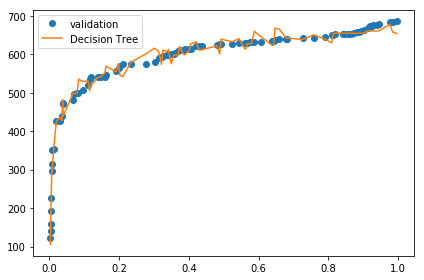

In [34]:
# dt_model_ = f"dt_model.pickle"
# print(f"Save model to file {dt_model_} ... ", end="")
# pickle.dump(dt_reg, open(dt_model_, "wb"))
# print("OK")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

X_test = np.sort(X_test, axis=0)
y_test = np.sort(y_test, axis=0)

y_pred_3 = dt_reg.predict(X_test)

plt.plot(X_test, y_test, 'o', label='validation')
plt.plot(X_test, y_pred_3, '-', label='Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()